# Cats and dogs clasificator

Details

* Binary Classification problem
* Colored Images
* No Standard Dimension
* Kaggle Dataset > https://drive.google.com/open?id=16AlwTDOeyFaiP3RPxKOk5s80IycK80X4
* We will use subset of this data 



Data

Train (2000 images)
*   class_a (1000 images)
*   class_b (1000 images)
---
Valid
*   class_a (500 images)
*   class_b (500 images)
---
Test
*   Test_folder (1000 images)


In [8]:
# libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [9]:
# training directories
train_dir = "/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_small/train"
validation_dir = "/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_small/validation"
test_dir = "/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_small/test"

** Data preprocessing **
* Read the picture files.
* Decode the JPEG content to RGB grids of pixels.
* Convert these into floating point tensors.
* Rescale the pixel vales (between 0 and 255) to the [0, 1] interval.

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
#Link : https://keras.io/preprocessing/image/

In [12]:
# Generating batches of tensor image data
# train_datagen = ImageDataGenerator(rescale = 1./255)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40, # to rotate the image ramdomly from 0 to 40
    width_shift_range=0.2, # shear the image form left or richt by 20 percent
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


Found 2002 images belonging to 2 classes.
Found 2002 images belonging to 2 classes.


In [13]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [14]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))

model.add(layers.MaxPooling2D((2 ,2))) # After this step we will have images of 75 x 75

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [16]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [17]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=50
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
100/100 [==============================] - 220s 2s/step - loss: 0.6921 - acc: 0.5086 - val_loss: 0.6773 - val_acc: 0.5900
Epoch 2/50
100/100 [==============================] - 21s 210ms/step - loss: 0.6762 - acc: 0.5575 - val_loss: 0.6603 - val_acc: 0.5930
Epoch 3/50
100/100 [==============================] - 21s 209ms/step - loss: 0.6663 - acc: 0.5787 - val_loss: 0.6408 - val_acc: 0.6230
Epoch 4/50
100/100 [==============================] - 21s 208ms/step - loss: 0.6539 - acc: 0.5928 - val_loss: 0.7107 - val_acc: 0.5480
Epoch 5/50
100/100 [==============================] - 21s 208ms/step - loss: 0.6407 - acc: 0.6115 - val_loss: 0.6459 - val_acc: 0.5590
Epoch 6/50
100/100 [==============================] - 21s 209ms/step - loss: 0.6293 - acc: 0.6463 - val_loss: 0.5998 - val_acc: 0.6590
Epoch 7/50
100/100 [==============================] - 21s 208ms/step - loss: 0.6276 - acc: 0.6418 - val_loss: 0.5765 - val_acc: 0.7130
Epoch 8/50
100/100 [==============================] - 21s

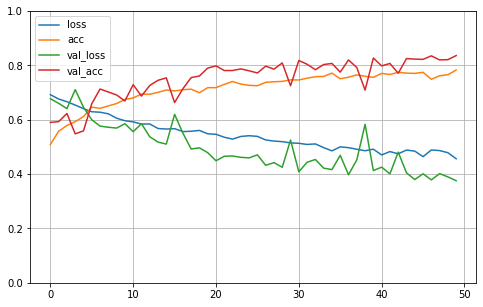

In [18]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [19]:
model.save("project_cnn.h5")

In [20]:
from tensorflow.keras import backend as k

k.clear_session()
del model